In [184]:
# basic python data handling analysis modules
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
# small utility functions
from utility import *

# interactive jupyter widgets!
# https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

In [185]:
Dataset_directory = ".."+os.sep+"Datasets"+os.sep
secondary_tmdb_dir = "E:\\Datasets\\themoviedb"

In [186]:
INT_df = pd.read_msgpack(secondary_tmdb_dir+os.sep+"INT_df.msgpack")

In [187]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [78]:
# INT_df["tmdbId"] = INT_df[search(INT_df,"tmdbId").index].fillna(method="ffill",axis=1)["SER_tmdbId"]#.notnull().sum()
# INT_df["movieId"] = INT_df[search(INT_df,"movieId").index].fillna(method="ffill",axis=1)["NUM_movieId"]#.notnull().sum()
# INT_df["uId"] = INT_df["tmdbId"].apply(lambda x: str(int(x)) if pd.notnull(x) else "NA")+"-"+INT_df["movieId"].apply(lambda x: str(int(x)) if pd.notnull(x) else "NA")

# # amalgamated tmbdId and movieIds

In [5]:
# INT_df = pd.read_msgpack(secondary_tmdb_dir+os.sep+"INT_df.msgpack")
# search(INT_df,"SER_")

In [6]:
# INT_df[search(INT_df,"release").index]

In [190]:
drop_ind = INT_df[INT_df["uId"]=="527218-NA"].index
INT_df.drop(drop_ind,inplace=True)

In [188]:
INT_df["TMB_release_date"].isnull().sum()

39229

In [189]:
INT_df["SER_releaseDate"].isnull().sum()

420822

In [191]:
# %%time
# I wonder if MovieLens would like to pay me for fixing their data?
INT_df.loc[INT_df["movieId"]==8688,"SER_releaseDate"] = "1968-12-13" # Shalako 13 December 1968
INT_df.loc[INT_df["movieId"]==33471,"SER_releaseDate"] = "2002-04-05" # https://www.imdb.com/title/tt0292553/?ref_=fn_al_tt_1
INT_df.loc[INT_df["movieId"]==46121,"SER_releaseDate"] = "2001-06-01" # https://www.imdb.com/title/tt0135024/releaseinfo?ref_=tt_dt_dt
INT_df.loc[INT_df["movieId"]==47991,"SER_releaseDate"] = "2005-06-09" # https://www.imdb.com/title/tt0383304/releaseinfo?ref_=tt_dt_dt
INT_df.loc[INT_df["movieId"]==42941,"SER_releaseDate"] = "1974-08-08" # https://www.imdb.com/title/tt0071840/releaseinfo?ref_=tt_dt_dt
INT_df.loc[INT_df["movieId"]==59300,"SER_releaseDate"] = "1986-09-12" # https://www.imdb.com/title/tt0090678/releaseinfo?ref_=tt_dt_dt
INT_df.loc[INT_df["movieId"]==55631,"SER_releaseDate"] = "2006-03-17" # https://www.imdb.com/title/tt0443446/releaseinfo?ref_=tt_dt_dt
INT_df.loc[INT_df["movieId"]==60034,"SER_releaseDate"] = "2007-01-22" # https://www.imdb.com/title/tt0893331/releaseinfo?ref_=tt_dt_dt
INT_df.loc[INT_df["movieId"]==97703,"SER_releaseDate"] = "2012-05-07" # https://www.imdb.com/title/tt2209386/releaseinfo?ref_=tt_dt_dt
INT_df.loc[INT_df["movieId"]==105159,"SER_releaseDate"] = "2012-07-13" # https://www.imdb.com/title/tt1859446/releaseinfo?ref_=tt_dt_dt
INT_df.loc[INT_df["movieId"]==105453,"SER_releaseDate"] = "2013-09-19" # https://www.imdb.com/title/tt2717558/releaseinfo?ref_=tt_dt_dt
INT_df.loc[INT_df["movieId"]==105855,"SER_releaseDate"] = "2013-10-11" # https://www.imdb.com/title/tt2286990/releaseinfo?ref_=tt_dt_dt
INT_df.loc[INT_df["movieId"]==109455,"SER_releaseDate"] = "2014-02-21" # https://www.imdb.com/title/tt2980794/releaseinfo?ref_=tt_dt_dt
INT_df.loc[INT_df["movieId"]==57486,"SER_releaseDate"] = "1970-10-23" # https://www.imdb.com/title/tt0066578/releaseinfo?ref_=tt_dt_dt
INT_df.loc[INT_df["movieId"]==53502,"SER_releaseDate"] = "1948-04-27" # https://www.imdb.com/title/tt0040098/releaseinfo?ref_=tt_dt_dt
INT_df.loc[INT_df["movieId"]==60049,"SER_releaseDate"] = "2007-05-30" # https://www.imdb.com/title/tt0832937/releaseinfo?ref_=tt_dt_dt

INT_df["SER_releaseDate"] = pd.to_datetime(INT_df["SER_releaseDate"].replace("0000-00-00",np.nan)).apply(lambda x: x.date())
## another problem - whole load of SER_releaseDates *just happen* to be the UNIX start date -> statistically improbable
# (yes, I checked whether it happened to be the data of a film festival - it was not!)
# also, more on one single date by an order of magnitude
matching_UNIX_start_date = INT_df["SER_releaseDate"]==pd.to_datetime("1969-12-31").date()
INT_df.loc[matching_UNIX_start_date,"SER_releaseDate"] = np.datetime64('NaT')

INT_df["SER_release_year"]  = INT_df["SER_releaseDate"].apply(lambda x: x.year if pd.notnull(x) else np.nan)
INT_df["SER_release_month"] = INT_df["SER_releaseDate"].apply(lambda x: x.month if pd.notnull(x) else np.nan)
INT_df["SER_release_day"]   = INT_df["SER_releaseDate"].apply(lambda x: x.day if pd.notnull(x) else np.nan)

INT_df["TMB_release_year"]  = INT_df["TMB_release_date"].apply(lambda x: x.year if pd.notnull(x) else np.nan)
INT_df["TMB_release_month"] = INT_df["TMB_release_date"].apply(lambda x: x.month if pd.notnull(x) else np.nan)
INT_df["TMB_release_day"]   = INT_df["TMB_release_date"].apply(lambda x: x.day if pd.notnull(x) else np.nan)

date_vars = ["TMB_release_date","SER_releaseDate"]
# hardfix SER and TMB, NUM_date looks fine
dates = INT_df[date_vars].applymap(lambda x: pd.to_datetime(x).date() if pd.notnull(x) else np.nan)
placeholder_month_day = dates.applymap(lambda x: (x.day==1) & (x.month==1) if pd.notnull(x) else np.nan)

INT_df.loc[ placeholder_month_day["TMB_release_date"]==True , "TMB_release_month" ] = np.nan
INT_df.loc[ placeholder_month_day["TMB_release_date"]==True , "TMB_release_day"   ] = np.nan

# Meh - no perfect solution - still waaay too many 1st of the month dates ...
# But we don't have enough data in NUM_date to compensate if you just toss them all out

# INT_df.loc[ INT_df["TMB_release_day"]==1 , "TMB_release_day"   ] = np.nan

INT_df.loc[ placeholder_month_day["SER_releaseDate" ]==True , "SER_release_month" ] = np.nan
INT_df.loc[ placeholder_month_day["SER_releaseDate" ]==True , "SER_release_day"   ] = np.nan
# INT_df.loc[ INT_df["SER_release_day"]==1 , "SER_release_day"   ] = np.nan


# this represents a very informal sensse of which source is most authoritative!
# TMB user content - least reliable, NUM website focused on accurate
# HETREC and SER are MovieLens data - not bad, but maybe not so well checked (HETREC in particular has problems)

# Concerned that HETREC is really very dodgy

In [194]:
release_year_cols = ['HETREC_year','TMB_release_year','SER_release_year','NUM_release_year']
INT_df["release_year"] = INT_df[release_year_cols].fillna(method="ffill",axis=1)[release_year_cols[-1]]
release_month_cols = ['TMB_release_month','SER_release_month','NUM_release_month']
INT_df["release_month"] = INT_df[release_month_cols].fillna(method="ffill",axis=1)[release_month_cols[-1]]
release_day_cols = ['TMB_release_day','SER_release_day','NUM_release_day']
INT_df["release_day"] = INT_df[release_day_cols].fillna(method="ffill",axis=1)[release_day_cols[-1]]

release_date_cols = ["TMB_release_date","SER_releaseDate"]
release_date = INT_df[release_date_cols].fillna(method="ffill",axis=1)[release_date_cols[-1]]
release_date = pd.to_datetime(release_date)
day_and_month_not_actually_given = (INT_df["release_day"]==1) & (INT_df["release_month"]==1)

In [195]:
match(INT_df,"release")

release_year     431740
release_month    366520
release_day      366520
dtype: int64

In [196]:
release_decade = INT_df["release_year"].apply(lambda x: str(int(10*np.floor(x/10))) if pd.notnull(x) else np.nan)
# release_decade_dummies = pd.get_dummies(release_decade , prefix = "release_decade__")

In [197]:
import calendar
from datetime import date
release_month = INT_df['release_month'].apply(lambda x: calendar.month_abbr[int(x)] if pd.notnull(x) else np.nan)
release_month[day_and_month_not_actually_given] = np.nan
# release_month_dummies = pd.get_dummies(release_month , prefix = "release_month__")
release_month.value_counts()

Oct    37336
Sep    33673
Nov    33186
Dec    32212
Mar    31766
Apr    31270
Jun    30636
Jan    29616
May    29198
Feb    27672
Aug    25930
Jul    23985
Name: release_month, dtype: int64

In [198]:
# day in month
release_day = INT_df['release_day'].copy()#.apply(lambda x: calendar.month_abbr[int(x)] if pd.notnull(x) else np.nan)
release_day.loc[day_and_month_not_actually_given] = np.nan
# release_day_dummies = pd.get_dummies(release_day , prefix = "release_day_of_the_month__")
# release_day_dummies.columns = release_day_dummies.columns.astype('int')
release_day.value_counts()

1.0     29555
2.0     14952
15.0    12692
10.0    12533
25.0    12029
6.0     11965
14.0    11838
20.0    11699
11.0    11699
12.0    11671
5.0     11655
9.0     11262
7.0     11186
21.0    11179
22.0    11106
4.0     11013
13.0    10931
8.0     10876
18.0    10876
23.0    10853
3.0     10841
24.0    10834
26.0    10826
16.0    10773
17.0    10685
19.0    10631
28.0    10584
30.0    10567
27.0    10463
29.0     9609
31.0     9097
Name: release_day, dtype: int64

In [199]:
release_weekday = release_date.apply(lambda x: calendar.day_name[x.weekday()] if pd.notnull(x) else np.nan)
release_weekday.loc[day_and_month_not_actually_given] = np.nan
# release_weekday_dummies = pd.get_dummies(release_weekday , prefix = "release_weekday__")
release_weekday.value_counts()

Friday       91588
Thursday     69162
Wednesday    61275
Tuesday      57179
Saturday     57177
Monday       48678
Sunday       46620
Name: SER_releaseDate, dtype: int64

In [18]:
# INT_df[release_weekday_dummies.columns]=release_weekday_dummies
# INT_df[release_day_dummies.columns]    = release_day_dummies
# INT_df[release_month_dummies.columns]  = release_month_dummies
# INT_df[release_decade_dummies.columns] = release_decade_dummies

In [200]:
INT_df["release_weekday_text"]=release_weekday
INT_df["release_day_of_the_month"]    =release_day
INT_df["release_month_text"]  =release_month
INT_df["release_decade"] =release_decade

In [201]:
# release_year, release_month, release_day
# release_decade, release_weekday_text (e.g. "Monday"), release_day_of_the_month, release_month_text (e.g. "July"), 


In [202]:
INT_df[["release_year","release_month","release_day","release_decade",
        "release_weekday_text","release_day_of_the_month","release_month_text"]].notnull().sum()

release_year                431740
release_month               366520
release_day                 366520
release_decade              431740
release_weekday_text        431679
release_day_of_the_month    366480
release_month_text          366480
dtype: int64

In [1]:
# INT_df["SER_genres_list"]

In [2]:
# genre data: HETREC/SER/ML/TMB
    # HETREC and ML already broken into dummies
    
# TMB_genres
# SER_genres_list

In [3]:
# genres

In [182]:
# SER_genre_set = list(set(flatten(INT_df["SER_genres_list"].dropna() ) ) )

# # INT_df["SER_genres_list"] = INT_df["SER_genres_list"].apply(lambda x: eval(x) if pd.notnull(x) else np.nan)
# flat_list = [item for sublist in INT_df["SER_genres_list"].dropna().values for item in sublist]
# genres = pd.DataFrame(flat_list).drop_duplicates()#.sort_values(by="movieId")

# for gen_ind in genres.index:
#     gen_name = "SER_genres__"+genres.loc[gen_ind,0]
#     INT_df[gen_name] = INT_df["SER_genres_list"].apply(lambda x: genres.loc[gen_ind,0] in x if isinstance(x,list) or pd.notnull(x) else np.nan)

# SER_genre_vars = search(INT_df,"SER_genres__[A-Z]",case_sensitive=True)
# SER_genre_vars

In [21]:
# tmdb_dir = create_subdir(Dataset_directory, "themoviedb")

# genre_categories = pd.read_msgpack( tmdb_dir + "genres.msgpack")
# genre_categories.set_index("id",inplace=True)# = genre_categories.id

In [203]:
# TMB_genre_set = list(genre_categories["name"].values)
# TMB_genre_set

In [112]:
# INT_df["TMB_genres"][0:10].apply(lambda x: [genre_categories.loc[y,"name"] for y in x])

In [183]:
# # SER_genre_set = list(set(flatten(INT_df["SER_genres_list"].dropna() ) ) )

# # INT_df["SER_genres_list"] = INT_df["SER_genres_list"].apply(lambda x: eval(x) if pd.notnull(x) else np.nan)
# # flat_list = [item for sublist in INT_df["TMB_genres"].dropna().values for item in sublist]
# genres = pd.DataFrame(TMB_genre_set).drop_duplicates()#.sort_values(by="movieId")

# for gen_ind in genres.index:
#     gen_name = "TMB_genres__"+genres.loc[gen_ind,0]
#     INT_df[gen_name] = INT_df["TMB_genres"].apply(lambda x: genre_categories.index[gen_ind] in x if isinstance(x,list) or pd.notnull(x) else np.nan)


    
# TMB_genre_vars = search(INT_df,"TMB_genres__[A-Z]",case_sensitive=True)
# INT_df[ TMB_genre_vars.index ] = INT_df[ TMB_genre_vars.index].replace(True,1).replace(False,0).astype('float32')    
# TMB_genre_vars




In [204]:
# INT_df[ search(INT_df,"TMB_genres__[A-Z]",case_sensitive=True).index] = INT_df[ search(INT_df,"TMB_genres__[A-Z]",case_sensitive=True).index].replace(True,1).replace(False,0).astype('float32')

In [25]:
# ML_genre_vars = search(INT_df,"ML_genres__[A-Z]",case_sensitive=True)

In [26]:
ML_genre_vars = search(INT_df,"ML_genres__[A-Z]",case_sensitive=True)

In [206]:
# INT_df.drop( ["TMB_genres"] , axis=1, inplace=True)

In [207]:
INT_df.rename(columns={"TMB_genres__Science Fiction": "TMB_genres__Sci-Fi"}, inplace=True)
INT_df.rename(columns={"TMB_genres__Family": "TMB_genres__Children"}, inplace=True)
INT_df.drop("HETREC_genres__Short",axis=1,inplace=True)
 

In [209]:
ML_common_genres = [x.replace("ML_genres__","") for x in ML_genre_vars.index]
TMB_only_genres = ["History","Music","TV Movie"] # foreign dropped
for genre in ML_common_genres:
#     INT_df["genre__"+genre] = 
    print(genre)
    if ('TMB_genres__'+genre) in INT_df.columns:
        gen_vars = ['TMB_genres__'+genre,'HETREC_genres__'+genre,'SER_genres__'+genre,'ML_genres__'+genre]
    else:
        gen_vars = ['HETREC_genres__'+genre,'SER_genres__'+genre,'ML_genres__'+genre]
    INT_df["genre__"+genre] = INT_df[gen_vars].fillna(method="ffill",axis=1)[gen_vars[-1]]
    
for genre in TMB_only_genres:
    gen_var = 'TMB_genres__'+genre
    INT_df["genre__"+genre]  = INT_df[gen_var]
    

int_genres = search(INT_df,"genre__",case_sensitive=True).index    
INT_df[int_genres] = INT_df[int_genres].astype('float')    

Adventure
Animation
Children
Comedy
Fantasy
Romance
Drama
Action
Crime
Thriller
Horror
Mystery
Sci-Fi
IMAX
Documentary
War
Musical
Western
Film-Noir


In [30]:
# TMB_only_genres = ["History","Music","TV Movie"]
# for genre in TMB_only_genres:
#     gen_var = 'TMB_genres__'+genre
#     INT_df["genre__"+genre]  = INT_df[gen_var]
    
# int_genres = search(INT_df,"genre__",case_sensitive=True).index    
# INT_df[int_genres] = INT_df[int_genres].astype('float')

In [210]:
# INT_df[int_genres].dtypes

In [211]:
INT_df.to_msgpack(secondary_tmdb_dir+os.sep+"INT_df_with_dates_and_genres.msgpack")

In [39]:
INT_df[int_genres].describe()

,genre__Adventure,genre__Animation,genre__Children,genre__Comedy,genre__Fantasy,genre__Romance,genre__Drama,genre__Action,genre__Crime,genre__Thriller,...,genre__Sci-Fi,genre__IMAX,genre__Documentary,genre__War,genre__Musical,genre__Western,genre__Film-Noir,genre__History,genre__Music,genre__TV Movie
count,470047.000000,470047.000000,470047.000000,470047.000000,470047.000000,470047.000000,470047.000000,470047.000000,470047.000000,470047.000000,...,470047.000000,59431.000000,470047.000000,470047.000000,59431.000000,470047.000000,59431.000000,467917.000000,467917.000000,467917.000000
mean,0.028559,0.042598,0.030544,0.149394,0.020528,0.055635,0.223224,0.052942,0.036735,0.049338,...,0.022221,0.003348,0.114182,0.012275,0.019350,0.010865,0.006243,0.014693,0.045314,0.015781
std,0.166563,0.201949,0.172078,0.356476,0.141797,0.229215,0.416408,0.223917,0.188110,0.216572,...,0.147402,0.057769,0.318033,0.110112,0.137754,0.103667,0.078763,0.120320,0.207991,0.124626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
INT_df[int_genres].notnull().sum()

genre__Adventure      470047
genre__Animation      470047
genre__Children       470047
genre__Comedy         470047
genre__Fantasy        470047
genre__Romance        470047
genre__Drama          470047
genre__Action         470047
genre__Crime          470047
genre__Thriller       470047
genre__Horror         470047
genre__Mystery        470047
genre__Sci-Fi         470047
genre__IMAX            59431
genre__Documentary    470047
genre__War            470047
genre__Musical         59431
genre__Western        470047
genre__Film-Noir       59431
genre__History        467917
genre__Music          467917
genre__TV Movie       467917
dtype: int64

In [34]:
INT_df.shape

(471634, 292)

In [37]:
search(INT_df,"runtime")

TMB_runtime    337083
dtype: int64

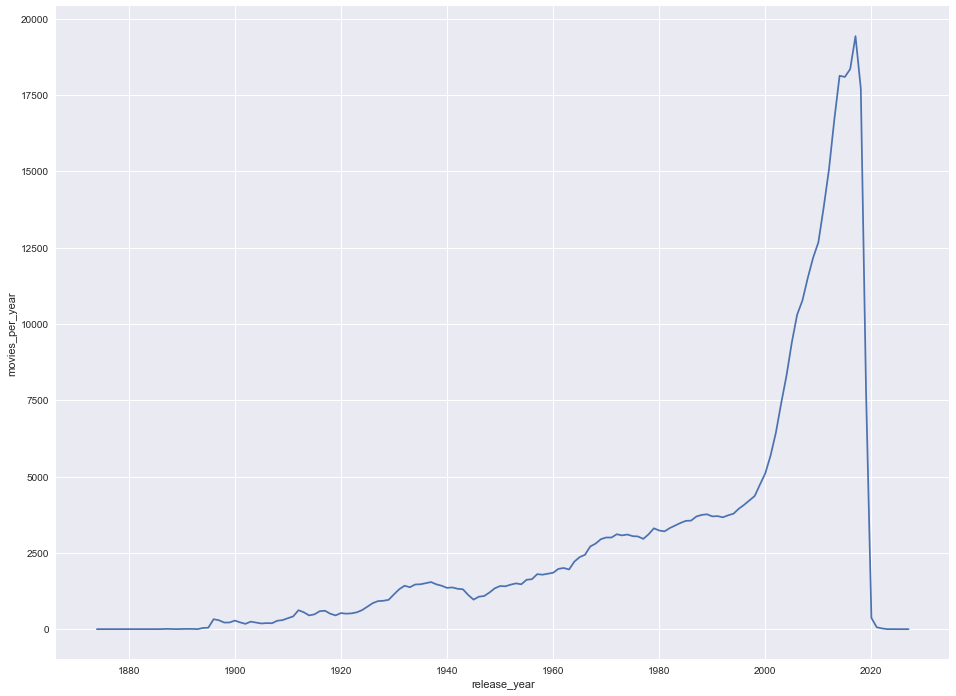

In [79]:
## (0) Release Year x Movie number
# movies per year / snapshot of dataset coverage

plt.figure(figsize=(16,12));
sns.lineplot(INT_df.groupby("release_year").count().index,INT_df.groupby("release_year").count()["uId"]);
plt.ylabel("movies_per_year");

In [147]:
INT_df[ INT_df["TMB_runtime"]>300 ][["single_genres","TMB_title","release_year","TMB_runtime","TMB_adult"]].sort_values(by="TMB_runtime")

,single_genres,TMB_title,release_year,TMB_runtime,TMB_adult
409966,NaN,Pourquoi la guerre aujourd’hui?,2015.0,301.0,False
330527,NaN,Animelo Summer Live 2016 刻-TOKI- 8.26,2017.0,301.0,False
278796,Music,Animelo Summer Live 2015 -THE GATE- 8.30,2016.0,301.0,False
322132,Crime,Widows 2,1985.0,301.0,False
328610,Romance,Adventures with the Baumgartners,2017.0,301.0,True
396839,NaN,Raw 26,2016.0,301.0,True
338764,Fantasy,Big Beautiful Women 2,2018.0,301.0,True
400212,NaN,The Ass Party 3,2013.0,302.0,True
348605,NaN,The Young & the Beautiful 3,2016.0,302.0,True
281537,NaN,NJPW Wrestle Kingdom 7,2013.0,302.0,False


In [159]:
INT_df[INT_df["uId"]=="NA-5176"].notnull().sum().sort_values(ascending=False).head(50)

uId                           5
movieId                       5
genre__Horror                 3
genre__Adventure              3
genre__Animation              3
genre__Children               3
genre__Comedy                 3
genre__Romance                3
genre__Drama                  3
genre__Action                 3
genre__Crime                  3
genre__Thriller               3
genre__Fantasy                3
genre__Mystery                3
genre__Musical                3
genre__Sci-Fi                 3
genre__Film-Noir              3
genre__Western                3
single_genres                 3
genre__Documentary            3
genre__IMAX                   3
genre__War                    3
release_decade                2
release_year                  2
SER_ratings_n                 1
SER_imdbId                    1
SER_num_starring              1
SER_starring_list             1
SER_num_genres                1
SER_num_directors             1
SER_director_list             1
SER_titl

In [160]:
INT_df["uId"].value_counts()[INT_df["uId"].value_counts()>1]
# 910 overlaps!

NA-5176      5
NA-2851      4
NA-1434      4
NA-4051      4
NA-32600     4
NA-769       4
NA-2270      4
NA-2258      4
NA-5738      4
NA-1421      4
NA-52281     4
NA-6955      4
NA-62336     3
NA-26379     3
NA-864       3
NA-106076    3
NA-1533      3
NA-101172    3
NA-62972     3
NA-7842      3
NA-4484      3
NA-75402     3
NA-96298     3
NA-38198     3
NA-31026     3
NA-89211     3
NA-1107      3
NA-106914    3
NA-1630      3
NA-90273     3
            ..
NA-26426     2
NA-185231    2
NA-147122    2
NA-55424     2
NA-102672    2
NA-60816     2
NA-157793    2
NA-53819     2
NA-38624     2
NA-44757     2
NA-163026    2
NA-180263    2
NA-187211    2
NA-27690     2
NA-81758     2
NA-120841    2
NA-26149     2
NA-26959     2
NA-26453     2
NA-107780    2
NA-48268     2
NA-178755    2
NA-27439     2
NA-7669      2
NA-176997    2
NA-107718    2
NA-93391     2
NA-159819    2
NA-64959     2
NA-170727    2
Name: uId, Length: 910, dtype: int64

In [181]:
# 527218-NA delete!

# INT_df.loc[320610].dropna()

In [84]:
search(INT_df,"title")

TMB_alternative_titles        467917
TMB_original_title            467917
TMB_title                     467917
TMB_num_alternative_titles    467917
HETREC_title                   10197
HETREC_spanishTitle            10197
SER_title                      49172
ML_title                       58098
NUM_title                       5252
dtype: int64

In [168]:
stupidly_long_movies = INT_df["TMB_runtime"]>300

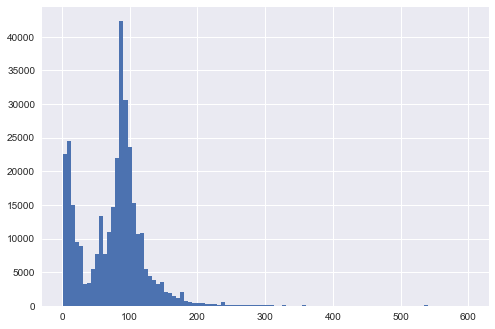

In [171]:
INT_df["TMB_runtime"][INT_df["TMB_runtime"]<=600].hist(bins=100)

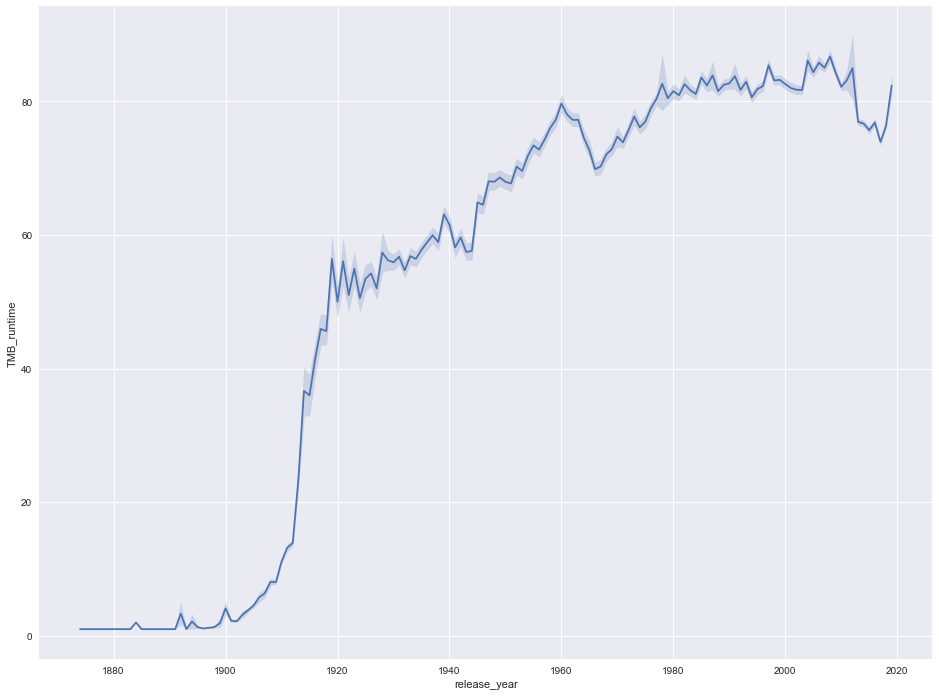

In [165]:
## (1) Release Year x Runtime

plt.figure(figsize=(16,12));
mask = (INT_df["release_year"]<2020)
sns.lineplot(x="release_year", y="TMB_runtime", data=INT_df[mask], ci=68);
# there's one obscenely long movie scheduled for 2020!

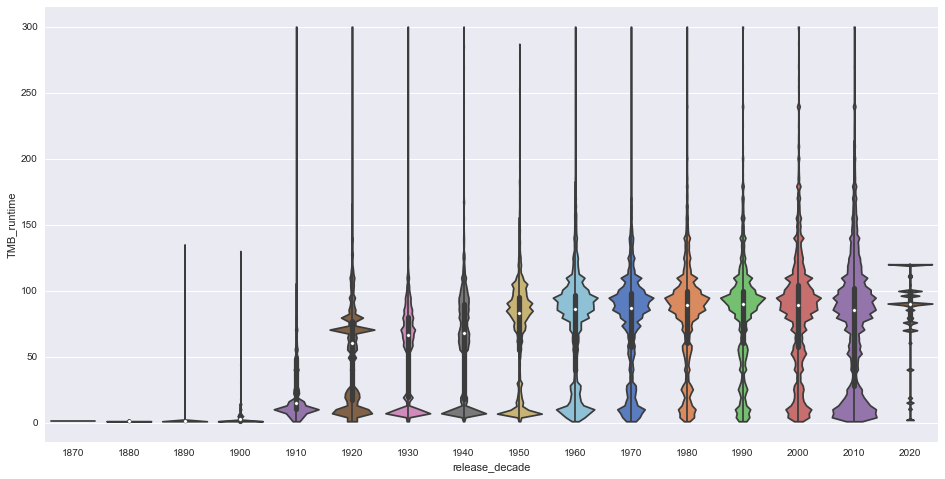

In [173]:
plt.figure(figsize=(16,8));
sns.violinplot(x="release_decade", y="TMB_runtime",
               order = INT_df["release_decade"].value_counts().sort_index().index,
              palette='muted', scale='width', cut=0,bw=.01, data = INT_df[~stupidly_long_movies]);
# probably not the bandwidth granularity to go with, but has a nice Rorschach feel to it "Which of these butterflies would you like to murder while pretending it's your mother?"

<Figure size 1152x576 with 0 Axes>

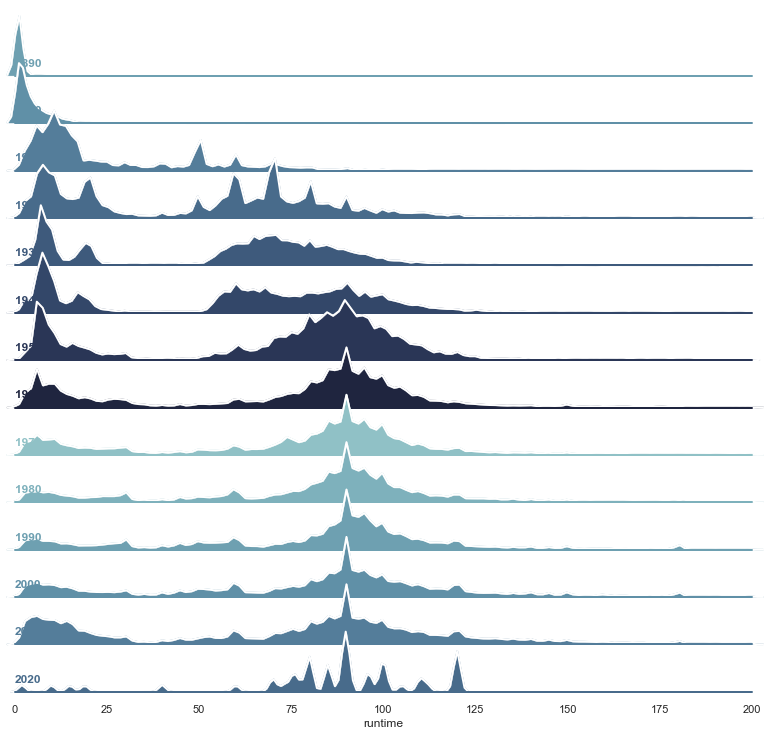

In [180]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# https://seaborn.pydata.org/examples/kde_ridgeplot.html
# yoink!
plt.figure(figsize=(16,8));

# sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(runtime=INT_df["TMB_runtime"], g=release_decade)).dropna()
# df.drop(df[df["g"].apply(lambda x: x in ["1890","1900"])].index, inplace=True)
df.drop(df[df["runtime"]>200].index, inplace=True)

# m = df.g.map(ord)
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.75, palette=pal,
                  row_order = ['1890','1900','1910', '1920', '1930', '1940', '1950', '1960', '1970',
       '1980', '1990', '2000', '2010','2020'], sharey=False);

# Draw the densities in a few steps
g.map(sns.kdeplot, "runtime", clip_on=False, shade=True, alpha=1, lw=1.5, bw=1)
g.map(sns.kdeplot, "runtime", clip_on=False, color="w", lw=2, bw=1)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes);


g.map(label, "runtime");

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25);
plt.xlim((0,200));

# Remove axes details that don't play well with overlap
g.set_titles("");
g.set(yticks=[]);
g.despine(bottom=True, left=True);

In [ ]:
####### Looking at the genre data

In [175]:
## MAKE SINGLE_GENRES (one categorical variable with a single most-specific genre for each movie with genre inf)

int_genres = match(INT_df,"genre__",case_sensitive=True).index

scarcity_ordered_genre_vars = INT_df[int_genres].sum().sort_values().index
no_genre = INT_df[scarcity_ordered_genre_vars].replace(0,np.nan).isnull().all(axis=1)
single_genres = INT_df[scarcity_ordered_genre_vars].astype('float').idxmax(axis=1)
single_genres[no_genre] = np.nan
single_genres = single_genres.apply(lambda x: x.replace("genre__","") if pd.notnull(x) else np.nan)
scarcity_ordered_genre_vars = [x.replace("genre__","") for x in scarcity_ordered_genre_vars]

INT_df["single_genres"]= single_genres

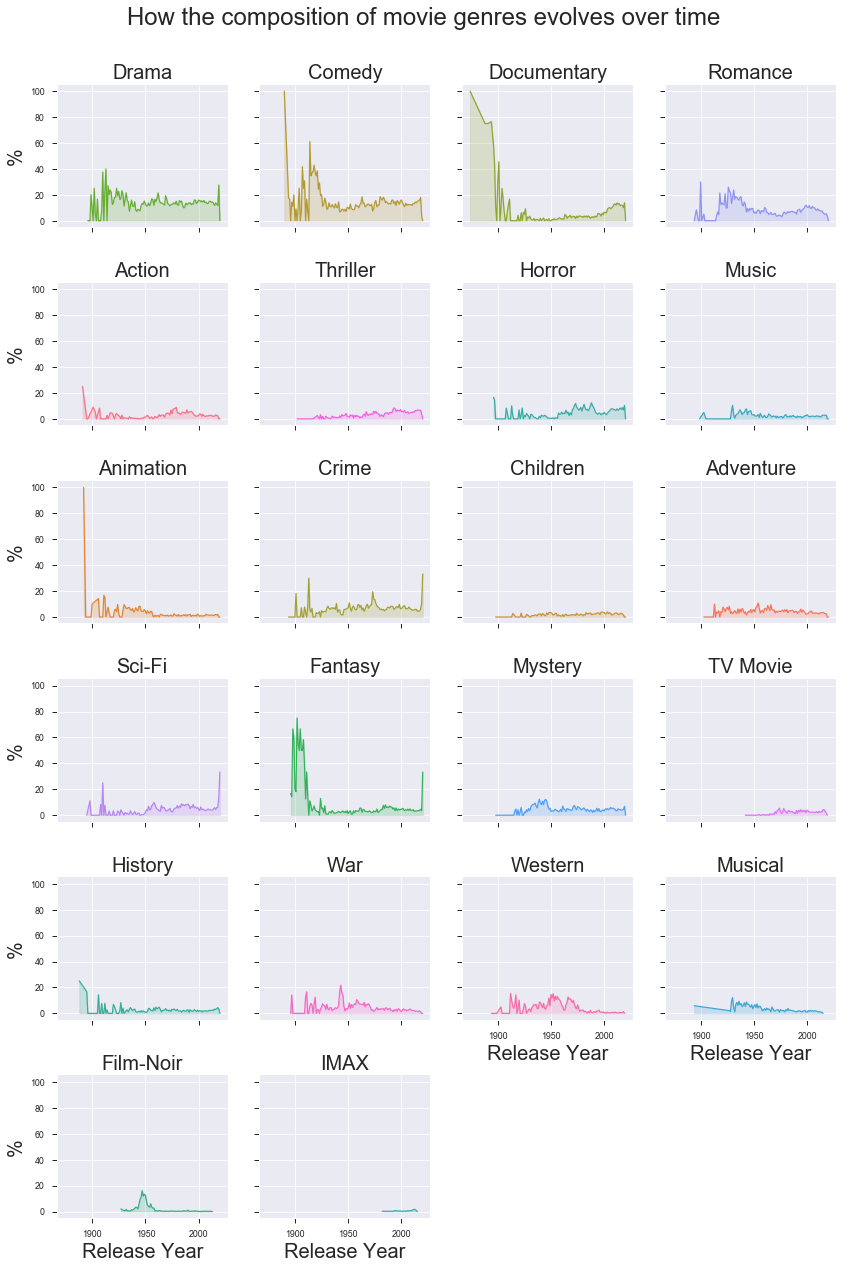

In [176]:
## same but with fully integrated genres
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":20})



# mask = (INT_df["release_year"]>=1905) & (INT_df["release_year"]<=2020)
mask = INT_df["release_year"].notnull()

df = INT_df[mask].groupby(["single_genres","release_year"])["movieId"].count().reset_index().dropna()
df["release_year"] = df["release_year"].astype('int')
year_sums = df.groupby("release_year").sum()
df = df.set_index("release_year")
df["movieId"] = df["movieId"]/year_sums.loc[df.index,"movieId"]

df = df.reset_index()
df.columns = ["Release Year","Genre","%"]
df["%"] = df["%"] * 100


# Create a grid : initialize it
g = sns.FacetGrid(df, col='Genre', hue='Genre', col_wrap=4, col_order =  scarcity_ordered_genre_vars[::-1])
 
# Add the line over the area with the plot function
g = g.map(plt.plot, "Release Year", '%')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, "Release Year", '%', alpha=0.2).set_titles("{col_name} genre")
 
# Control the title of each facet
g = g.set_titles("{col_name}", fontsize=28)
 
# Add a title for the whole plo
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('How the composition of movie genres evolves over time', fontsize=24)
 
plt.show()


In [177]:
df = INT_df[list(int_genres)+["release_year"]].dropna().astype('int').set_index("release_year")
df.columns = [x.replace("TMB_genres_","") for x in df.columns]
df = df.groupby("release_year").sum().sort_index()
df = df.apply(lambda x: 100*x/df.sum(axis=1))

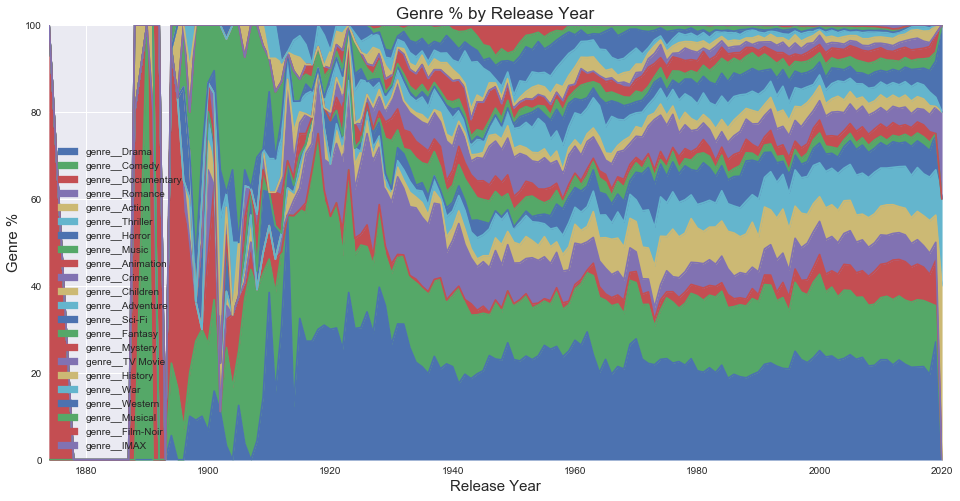

In [178]:
plt.figure(figsize=(16,8));
plt.style.use('seaborn')
df[["genre__"+x for x in scarcity_ordered_genre_vars][::-1]].plot.area(ax = plt.gca())
plt.xlabel('Release Year', fontsize=15)
plt.ylabel('Genre %', fontsize=15)
plt.title('Genre % by Release Year',fontsize=17)
plt.ylim([0,100])

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
# ax.legend( [handles[labels.index(x)] for x in scarcity_ordered_genre_vars[::-1]],  [labels[labels.index(x)] for x in scarcity_ordered_genre_vars[::-1]])
# plt.show()